### <font color='red'> Import packages</font>

In [12]:
!pip3 install pandas tensorflow matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### <font color='red'> Read CSV file into pandas dataframe</font>

In [14]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.columns = [col.strip() for col in data.columns]

### <font color='red'> Print total observations(rows) and columns </font>

In [15]:
# Total rows
print(f"Total number of observations: {data.shape[0]}\n")

# Total columns
print(f"Total number of columns: {data.shape[1]}\n")

Total number of observations: 39644

Total number of columns: 61



### <font color='red'> Print descriptions of each columns </font>

In [16]:
# Data descriptions
columns = data.columns
for column in columns:
    print(f"Description of column {column}: \n{data[column].describe()}\n")

Description of column url: 
count                                                 39644
unique                                                39644
top       http://mashable.com/2013/01/07/amazon-instant-...
freq                                                      1
Name: url, dtype: object

Description of column timedelta: 
count    39644.000000
mean       354.530471
std        214.163767
min          8.000000
25%        164.000000
50%        339.000000
75%        542.000000
max        731.000000
Name: timedelta, dtype: float64

Description of column n_tokens_title: 
count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64

Description of column n_tokens_content: 
count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.

In [17]:
pd.set_option('display.max_columns', None)
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

### <font color='red'> Print how many data is missing </font>

In [18]:
print(f"Missing data:\n{data.isnull().sum()}")

Missing data:
url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64


### <font color='red'> Indicate of No missing value due to the color of the heatmap is the same </font>

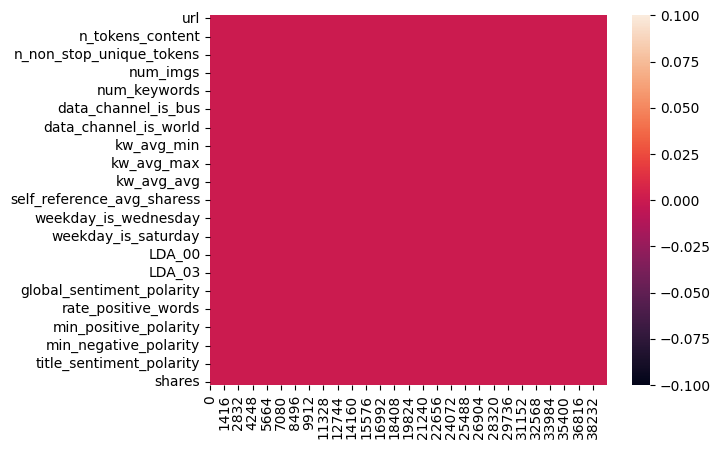

In [19]:
sns.heatmap(data.isna().transpose())
plt.show()

### <font color='red'> Plot data </font>

<Figure size 5000x5000 with 0 Axes>

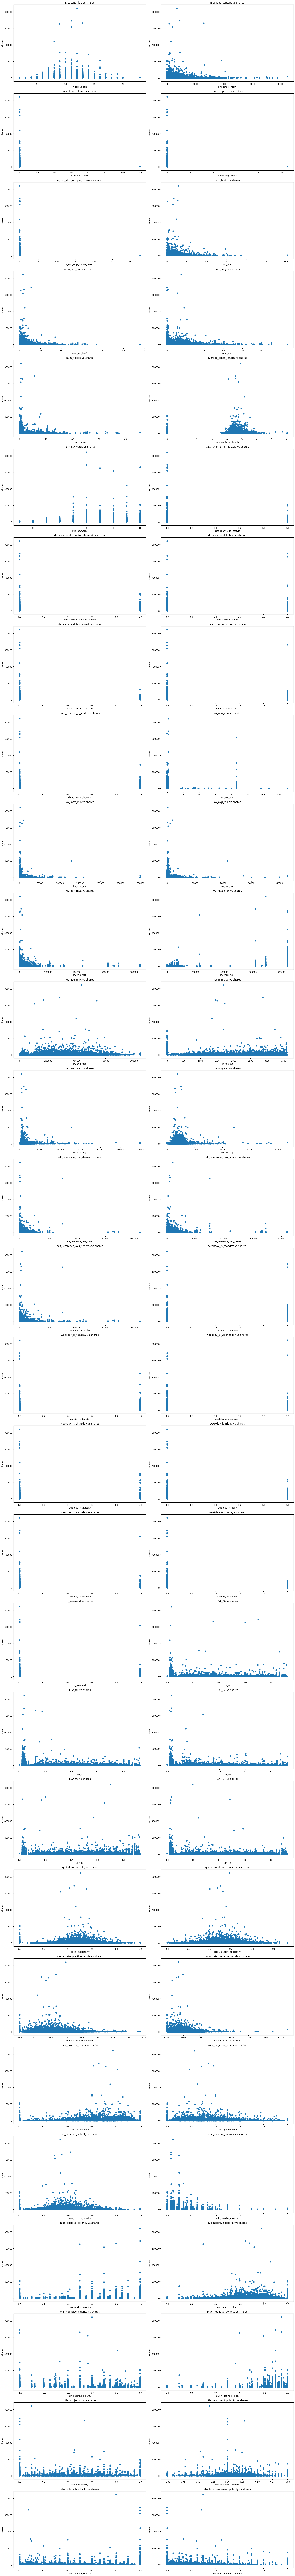

In [20]:
fig = plt.figure(figsize=(50, 50))

# Remove all data can not be plotted
plot_columns = []
for column in columns:
    if column not in ['url', 'timedelta', 'shares']:
        plot_columns.append(column)

plt_cols = 2
plt_rows = 29

fig, axes = plt.subplots(nrows=plt_rows, ncols=plt_cols, figsize=(20, 6*plt_rows))

for i, col in enumerate(plot_columns):
    ax = axes[i // plt_cols, i % plt_cols]
    ax.scatter(data[col], data['shares'])
    ax.set_xlabel(col)
    ax.set_ylabel('shares')
    ax.set_title(f'{col} vs shares')

plt.tight_layout()
plt.show()

### <font color='red'> Data distribution </font>

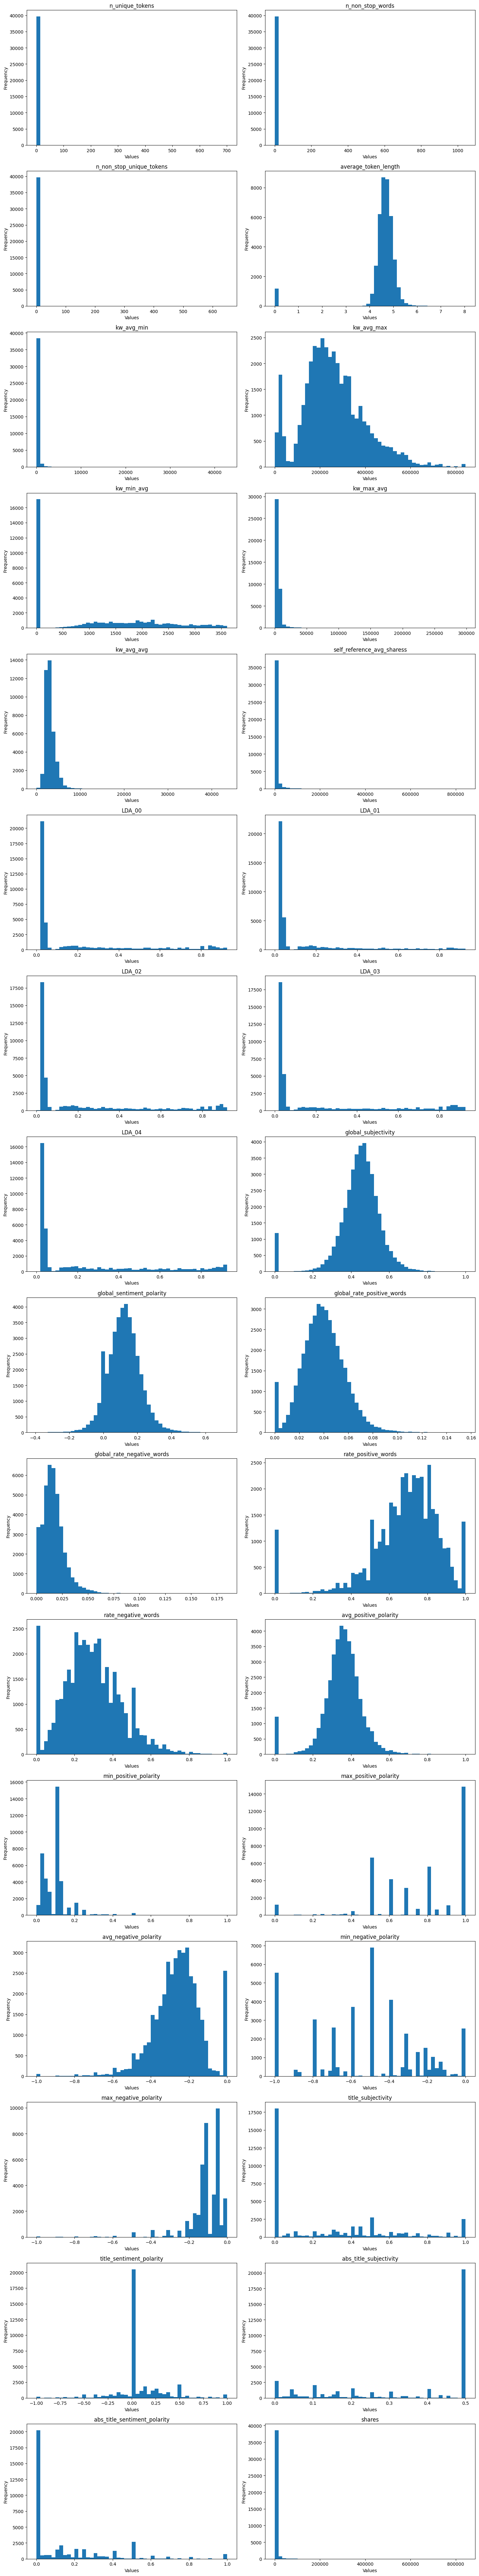

In [21]:
# Continuous columns histograms

# List of discrete columns provided by the user
discrete_cols = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
    'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
    'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
    'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'url',
    'timedelta', 'n_tokens_title', 'n_tokens_content', 'num_hrefs',
    'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
    'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max', 'self_reference_min_shares',
    'self_reference_max_shares'
]
# Remove discrete columns from being plotted
continuous_data = data.drop(columns=discrete_cols)

fig, axes = plt.subplots(nrows=len(continuous_data.columns) // 2 + len(continuous_data.columns) % 2, ncols=2, figsize=(15, 80))

for ax, column in zip(axes.flatten(), continuous_data.columns):
    continuous_data[column].hist(ax=ax, bins=50, grid=False)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(continuous_data.columns), len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

### <font color='red'> Correlation Matrix </font>

<Axes: >

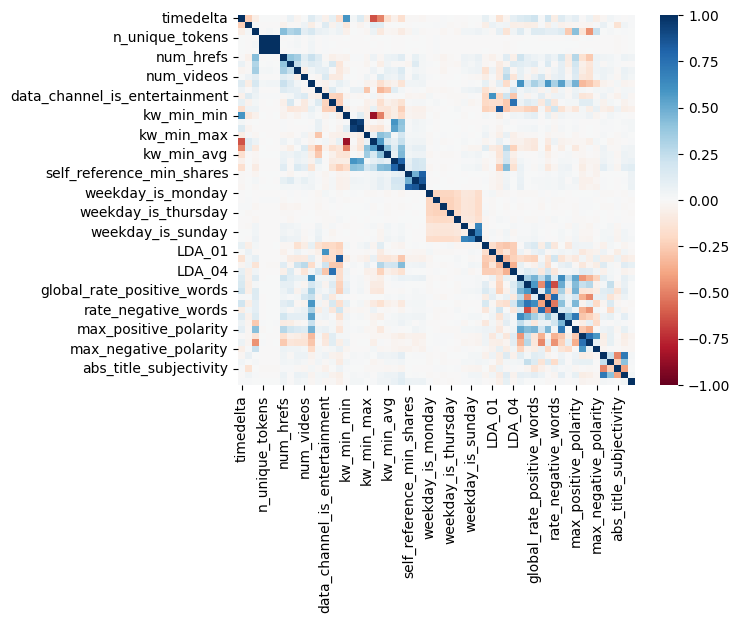

In [39]:
# Drop the url column
# We removed some features we thought were irrelevant to make ther heatmap more visible
data_features_reduced = data.drop(['url', 'data_channel_is_lifestyle', 'data_channel_is_lifestyle', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_entertainment'], axis=1)

sns.heatmap(data_features_reduced.corr(), annot= False, vmin=-1, vmax=1, center=0, cmap= 'RdBu')